<a href="https://colab.research.google.com/github/PedroConst/EQE-358-Metodos-Numericos/blob/main/Gabaritos/Lista_05_Gabarito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EQE 358- Métodos Numéricos Aplicados a Processos Químicos
##Lista de Exercícios 05
###Prof. Pedro Constantino

# Métodos de Integração de EDO

In [ ]:
def metodo_euler_explicito(x0, y0, n, h):
    # x0 = valor inicial para x
    # y0 = valor inicial para y
    # n = número de passos
    # h = tamanho do passo
    # Requer a função getf(x,y)

    # Inicializa o contador e os vetores de saída para x e y
    k = 0
    x = np.zeros(n)
    y = np.zeros(n)

    # Inicializa x e y com os valores iniciais
    x[0] = x0
    y[0] = y0

    # Loop principal para realizar os cálculos
    for i in range(0, n-1):

        y[i+1] = y[i] + h * getf(x[i], y[i]) # Atualiza o valor de y usando o método de Euler explícito
        x[i+1] = x[i] + h                    # Incrementa o valor de x

    # Retorna os vetores de saída com os valores de x e y calculados
    return x, y




In [ ]:
def metodo_euler_implicito(x0, y0, n, h):
    # x0 = valor inicial para x
    # y0 = valor inicial para y
    # n = número de passos a serem dados
    # h = tamanho do passo
    # Requer a função getR(y,x) e getdR(y,x)

    # Inicializar os vetores de saída para x e y
    x = np.zeros(n)
    y = np.zeros(n)

    # Definir condição iniciais do PVI e tolerância
    x[0] = x0
    y[0] = y0
    tol = 1e-8

    for i in range(0,n-1):

        # Inicializar contador e chute inicial para y[i+1] (Método de Continuação de Ordem Zero)
        k = 0
        y[i+1] = y[i]
        x[i+1] = x[i] + h

        # Calcular f e df do Método de Euler Implícito no chute inicial de y[i+1]
        R = y[i+1]-y[i]-h*getf(x[i+1], y[i+1])
        dR = 1-h*getdf(x[i+1], y[i+1])

        # Fazer iterações de Newton até convergir y[i+1]
        while abs(R) > tol:
            # Atualizar y[i+1] pelo Método de Newton
            y[i+1] = y[i+1] - R / dR

            # Atualizar o contador de Newton e os valores de f e df
            k = k + 1
            R = y[i+1] - y[i] - h*getf(x[i+1], y[i+1])
            dR = 1.0 - h*getdf(x[i+1], y[i+1])

    return x, y

In [ ]:
def metodo_crank_nicolson(x0, y0, n, h):
    # x0 = valor inicial para x
    # y0 = valor inicial para y
    # n = número de passos a serem dados
    # h = tamanho do passo
    # Requer a função getf(x,y) e getdf(x,y)

    # Inicializar os vetores de saída para x e y
    x = np.zeros(n)
    y = np.zeros(n)

    # Definir condição iniciais do PVI e tolerância
    x[0] = x0
    y[0] = y0
    tol = 1e-8

    for i in range(0,n-1):

        # Inicializar contador e chute inicial para y[i+1] (Método de Continuação de Ordem Zero)
        k = 0
        y[i+1] = y[i]
        x[i+1] = x[i] + h

        # Calcular f e df do Método de Crank-Nicolson no chute inicial de y[i+1]
        R = y[i+1]-y[i]-(h/2)*(getf(x[i], y[i])+getf(x[i+1], y[i+1]))
        dR = 1-(h/2)*getdf(x[i+1], y[i+1])

        # Fazer iterações de Newton até convergir y[i+1]
        while abs(R) > tol:
            # Atualizar y[i+1] pelo Método de Newton
            y[i+1] = y[i+1] - R / dR

            # Atualizar o contador de Newton e os valores de f e df
            k = k + 1
            R = y[i+1]-y[i]-(h/2)*(getf(x[i], y[i])+getf(x[i+1], y[i+1]))
            dR = 1-(h/2)*getdf(x[i+1], y[i+1])

    return x, y

In [ ]:
def metodo_heun(x0, y0, n, h):
    # x0 = valor inicial para x
    # y0 = valor inicial para y
    # n = número de passos
    # h = tamanho do passo
    # Requer a função getf(x,y)

    # Inicializa o contador e os vetores de saída para x e y
    k = 0
    x = np.zeros(n)
    y = np.zeros(n)

    # Inicializa x e y com os valores iniciais
    x[0] = x0
    y[0] = y0

    # Loop principal para realizar os cálculos
    for i in range(0, n-1):

        # Predizer o valor de y usando Euler Explícito
        yp = y[i] + h * getf(x[i], y[i])

        # Corrigir o valor de y usando Euler "Implícito"
        yc = y[i] + h * getf(x[i]+h, yp)

        # Atualizar y[i+1] como a média da predição-correção
        y[i+1] = (yp+yc)/2

        x[i+1] = x[i] + h                    # Incrementa o valor de x

    # Retorna os vetores de saída com os valores de x e y calculados
    return x, y


In [ ]:
def metodo_ponto_medio(x0, y0, n, h):
    # x0 = valor inicial para x
    # y0 = valor inicial para y
    # n = número de passos
    # h = tamanho do passo
    # Requer a função getf(x,y)

    # Inicializa o contador e os vetores de saída para x e y
    k = 0
    x = np.zeros(n)
    y = np.zeros(n)

    # Inicializa x e y com os valores iniciais
    x[0] = x0
    y[0] = y0

    # Loop principal para realizar os cálculos
    for i in range(0, n-1):

        # Calcular o ponto médio
        xm = x[i] + h/2
        ym = y[i] + (h/2)*getf(x[i],y[i])

        # Atualizar y[i+1] com base no ponto médio
        y[i+1] = y[i] + h * getf(xm,ym)

        x[i+1] = x[i] + h   # Incrementa o valor de x

    # Retorna os vetores de saída com os valores de x e y calculados
    return x, y


In [ ]:
def metodo_Runge_Kutta(x0, y0, n, h):
    # x0 = valor inicial para x
    # y0 = valor inicial para y
    # n = número de passos
    # h = tamanho do passo
    # Requer a função getf(y,x)

    # Inicializa o contador e os vetores de saída para x e y
    k = 0
    x = np.zeros(n)
    y = np.zeros(n)

    # Inicializa x e y com os valores iniciais
    x[0] = x0
    y[0] = y0

    # Loop principal para realizar os cálculos
    for i in range(0, n-1):

        # Avaliar as funções de Runge-Kutta
        k1 = getf(x[i],y[i])
        k2 = getf(x[i] + h/2, y[i] + h*k1/2)
        k3 = getf(x[i] + h/2, y[i] + h*k2/2)
        k4 = getf(x[i] + h  , y[i] + h*k3)

        # Atualizar y[i+1] pela média ponderada
        y[i+1] = y[i] + (h/6) *(k1 + 2*k2 + 2*k3 + k4)

        x[i+1] = x[i] + h   # Incrementa o valor de x

    # Retorna os vetores de saída com os valores de x e y calculados
    return x, y


---


#**Problema 2**

---

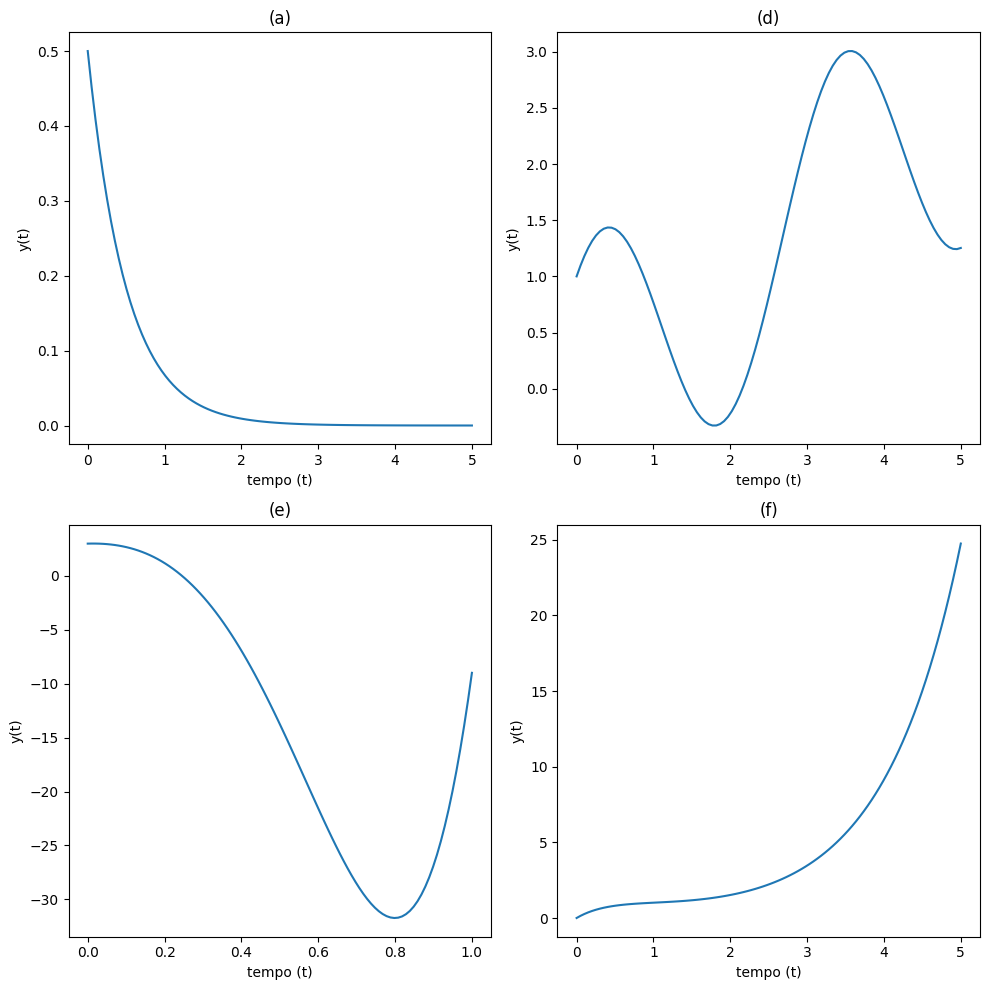

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def ya(t):
    out = 0.5*np.exp(-2*t)
    return out

def yd(t):
    out = t/2 + np.cos(2*t)+(3/4)*np.sin(2*t)
    return out

def ye(t):
    out = np.exp(3*t)*(3*np.cos(4*t)-2*np.sin(4*t))
    return out

def yf(t):
    out = (5/2)*np.exp(-t)-(8/3)*np.exp(-2*t)+(1/6)*np.exp(t)
    return out

t = np.linspace(0,5,100)
t2 = np.linspace(0,1,100)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(t,ya(t))
plt.xlabel('tempo (t)')
plt.ylabel('y(t)')
plt.title('(a)')

plt.subplot(2,2,2)
plt.plot(t,yd(t))
plt.xlabel('tempo (t)')
plt.ylabel('y(t)')
plt.title('(d)')

plt.subplot(2,2,3)
plt.plot(t2,ye(t2))
plt.xlabel('tempo (t)')
plt.ylabel('y(t)')
plt.title('(e)')

plt.subplot(2,2,4)
plt.plot(t,yf(t))
plt.xlabel('tempo (t)')
plt.ylabel('y(t)')
plt.title('(f)')
plt.tight_layout()
plt.show()


---


#**Problema 3**

---

Text(0, 0.5, 'y(t)')

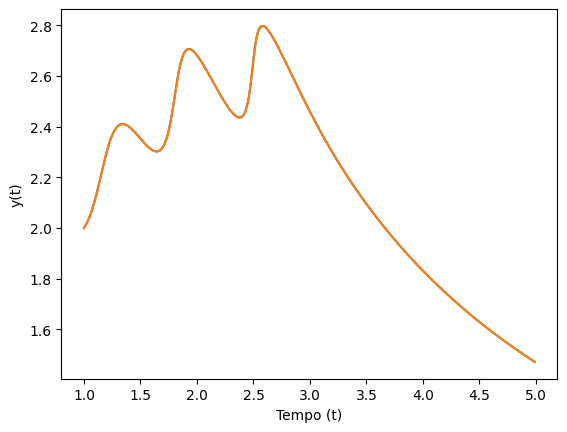

In [ ]:
# Definir a função f(y,t)
def getf(t,y):
    f = t*(y**(-0.5))+t*np.sin(np.pi*y*t)
    return f

t0 = 1.0      # Escolher o instante inicial
y0 = 2.0      # Definir a condição inicial
tf = 5.0      # Definir o instante final
h = 0.01      # Escolher um passo de integração

n = int((tf-t0)/h) # Calcular o número de passos

# Chamar a função do Método de Euler Explícito
t, yexp1 = metodo_euler_explicito(t0, y0, n, h)

# Plotar os resultados
plt.plot(t,yexp1)
plt.plot(t,yexp1)
plt.xlabel('Tempo (t)')
plt.ylabel('y(t)')

---


**Problema 3b**

---

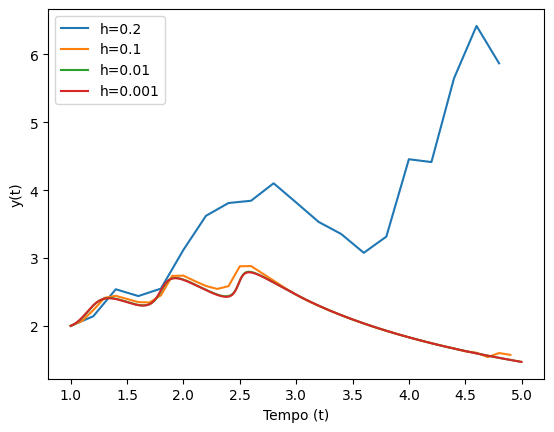

In [ ]:
h1 = 0.2
n1 = int((tf-t0)/h1) # Calcular o número de passos

h2 = 0.1
n2 = int((tf-t0)/h2) # Calcular o número de passos

h3 = 0.01
n3 = int((tf-t0)/h3) # Calcular o número de passos

h4 = 0.0001
n4 = int((tf-t0)/h4) # Calcular o número de passos

# Chamar a função do Método de Euler Explícito
t1, yexp1 = metodo_euler_explicito(t0, y0, n1, h1)
t2, yexp2 = metodo_euler_explicito(t0, y0, n2, h2)
t3, yexp3 = metodo_euler_explicito(t0, y0, n3, h3)
t4, yexp4 = metodo_euler_explicito(t0, y0, n4, h4)

# Plotar os resultados
plt.plot(t1,yexp1)
plt.plot(t2,yexp2)
plt.plot(t3,yexp3)
plt.plot(t4,yexp4)

plt.xlabel('Tempo (t)')
plt.ylabel('y(t)')
plt.legend(['h=0.2','h=0.1','h=0.01','h=0.001'])

Claramente, a solução é mais instável ou diverge quando o passo de integração $h$ é muito alto.

---


**Problema 3c**

---

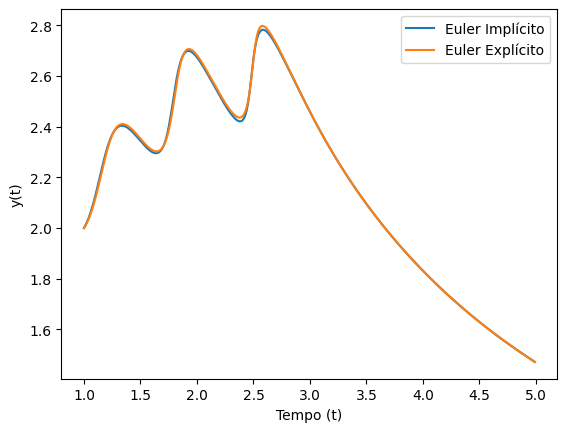

In [ ]:
# Definir a derivada de f(y,t)
def getdf(t,y):
    df = -0.5*t*(y**(-1.5))+np.pi*t*t*np.cos(np.pi*y*t)
    return df

t0 = 1.0      # Escolher o instante inicial
y0 = 2.0      # Definir a condição inicial
tf = 5.0      # Definir o instante final
h = 0.01      # Escolher um passo de integração

n = int((tf-t0)/h) # Calcular o número de passos

# Chamar a função do Método de Euler Explícito
t, yimp = metodo_euler_implicito(t0, y0, n, h)

# Plotar os resultados
plt.plot(t,yimp)
plt.plot(t3,yexp3)
plt.xlabel('Tempo (t)')
plt.ylabel('y(t)')
plt.legend(['Euler Implícito','Euler Explícito'])

#**Problema 6**

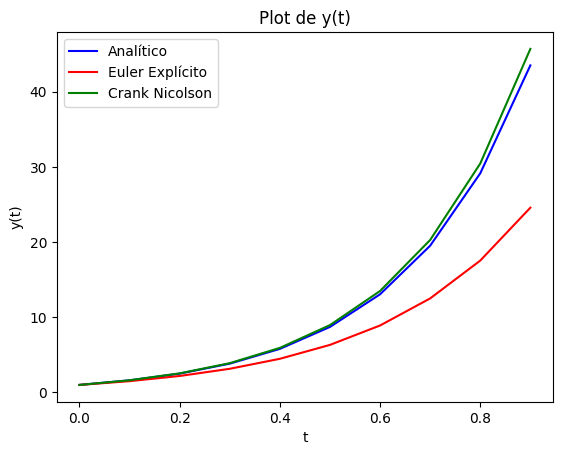

In [ ]:
# Definir a função f(t,y)
def getf(t,y):
    f = 1-t+4*y
    return f

# Definir a solução analítica y(t)
def y_exato(t):
    return (1/4)*t+(19/16)*np.exp(4*t)-(3/16)

t0 = 0      # Escolher o instante inicial
y0 = 1      # Definir a condição inicial
n = 10     # Definir o número de passos
h = 0.1    # Escolher um passo de integração

# Calcular y(t) por Euler Explícito
t, y_exp = metodo_euler_explicito(t0, y0, n, h)

# Calcular y(t) por Heun (Predição-Correção)
t, y_heun = metodo_heun(t0, y0, n, h)

# Plotar os gráficos
plt.plot(t, y_exato(t), color='blue')
plt.plot(t, y_exp, color='red')
plt.plot(t, y_heun, color='green')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Plot de y(t)')
plt.legend(['Analítico','Euler Explícito','Predição-Correção' ])
plt.show()

# **Problema 7**

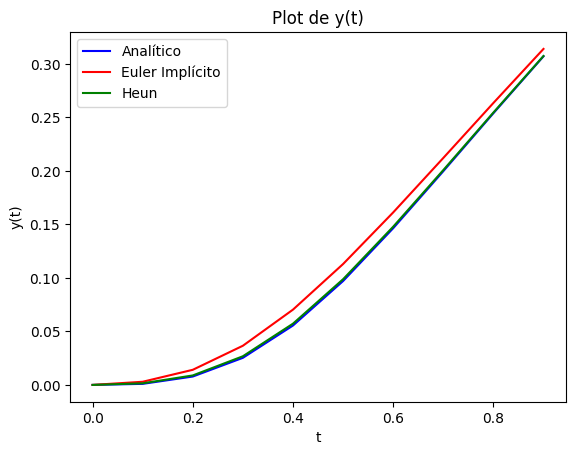

In [ ]:
# Definir a função f(t,y)
def getf(t,y):
    f = 3*(t**2)*(np.exp(-5*y))
    return f

# Definir a derivada de f(t,y)
def getdf(t,y):
    df = -15*(t**2)*(np.exp(-5*y))
    return df

# Definir a solução analítica y(t)
def y_exato(t):
    return (1/5) * np.log(5 * t**3 + 1)

t0 = 0      # Escolher o instante inicial
y0 = 0      # Definir a condição inicial
n = 10     # Definir o número de passos
h = 0.1    # Escolher um passo de integração

# Calcular y(t) por Euler Implícito
t, y_imp = metodo_euler_implicito(t0, y0, n, h)

# Calcular y(t) por Heun
t, y_heun = metodo_heun(t0, y0, n, h)

# Plotar os gráficos
plt.plot(t, y_exato(t), color='blue')
plt.plot(t, y_imp, color='red')
plt.plot(t, y_heun, color='green')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Plot de y(t)')
plt.legend(['Analítico','Euler Implícito','Heun' ])
plt.show()

# **Problema 8**

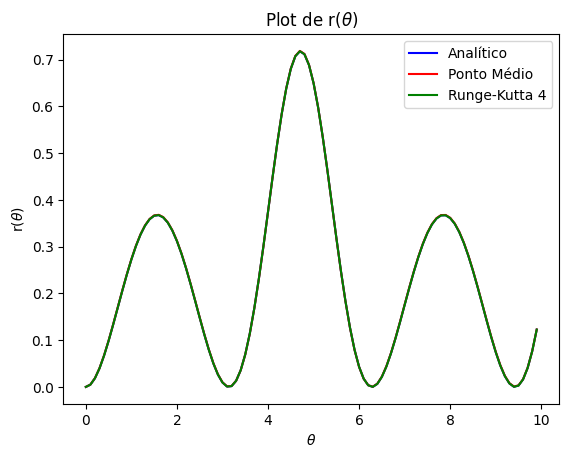

In [ ]:
# Definir a função f(t,y)
def getf(t,y):
    f = (1/2)*(np.sin(2*t))-y*np.cos(t)
    return f

# Definir a derivada de f(t,y)
def getdf(t,y):
    df = -np.cos(t)
    return df

# Definir a solução analítica y(t)
def y_exato(t):
    return np.sin(t)-1+np.exp(-np.sin(t))

t0 = 0      # Escolher o instante inicial
y0 = 0      # Definir a condição inicial
n = 100     # Definir o número de passos
h = 0.10    # Escolher um passo de integração

# Calcular y(t) por Método do Ponto Médio
t, y_medio = metodo_ponto_medio(t0, y0, n, h)

# Calcular y(t) por Runge Kutta 4a Ordem
t, y_RK = metodo_Runge_Kutta(t0, y0, n, h)

# Plotar os gráficos
plt.plot(t, y_exato(t), color='blue')
plt.plot(t, y_medio, color='red')
plt.plot(t, y_RK, color='green')
plt.xlabel(r'$\theta$')
plt.ylabel(r'r($\theta$)')
plt.title(r'Plot de r($\theta$)')
plt.legend(['Analítico','Ponto Médio','Runge-Kutta 4' ])
plt.show()